# 1. Exploratory Data Analysis and Data Pre-Processing

In this notebook, the data will be analzyed through exploratory data analysis techniques such as word count, descriptive statistics, and n-gram analysis. Then, the data will be pre-processed using natural language processing techniques.

The datasets that will be used for this project originate from Kaggle. To download the dataset, kagglehub needs to be installed. Wordcloud and textblob wil be used for EDA.

In [1]:
%pip install kagglehub
%pip install wordcloud
%pip install textblob

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

# Download all Datasets from Kaggle

- https://www.kaggle.com/datasets/rajneesh231/lex-fridman-podcast-transcript

In [ ]:
# Download all of the datasets from kaggle
import kagglehub

# Download latest version
podcast_path = kagglehub.dataset_download("rajneesh231/lex-fridman-podcast-transcript")
print("Path to podcast dataset files:", podcast_path)

Path to podcast dataset files: /root/.cache/kagglehub/datasets/rajneesh231/lex-fridman-podcast-transcript/versions/2


In [ ]:
# Check the files in the directory

print("Podcast Files:")
print(os.listdir(podcast_path))

Podcast Files:
['podcastdata_dataset.csv']


In [5]:
import pandas as pd

podcast_df = pd.read_csv(podcast_path + "/podcastdata_dataset.csv")
podcast_df.head()

,id,guest,title,text
0,1,Max Tegmark,Life 3.0,"As part of MIT course 6S099, Artificial Genera..."
1,2,Christof Koch,Consciousness,As part of MIT course 6S099 on artificial gene...
2,3,Steven Pinker,AI in the Age of Reason,"You've studied the human mind, cognition, lang..."
3,4,Yoshua Bengio,Deep Learning,What difference between biological neural netw...
4,5,Vladimir Vapnik,Statistical Learning,The following is a conversation with Vladimir ...


In [6]:
# print the shape of the dataframes
print("Podcast Dataframe Shape:", podcast_df.shape)

Podcast Dataframe Shape: (319, 4)


In [ ]:
podcast_df = podcast_df[['text']]
podcast_df.head()

,text
0,"As part of MIT course 6S099, Artificial Genera..."
1,As part of MIT course 6S099 on artificial gene...
2,"You've studied the human mind, cognition, lang..."
3,What difference between biological neural netw...
4,The following is a conversation with Vladimir ...


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) reveals details and characteristics about the dataset that should be taken into account for data pre-processing and training.

## Podcast Dataset EDA

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
import spacy

In [12]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Descriptive Statistics:
                                                     text
count                                                 319
unique                                                318
top     The following is a conversation with Kyle Vogt...
freq                                                    2


Missing Values Analysis:
text    0
dtype: int64




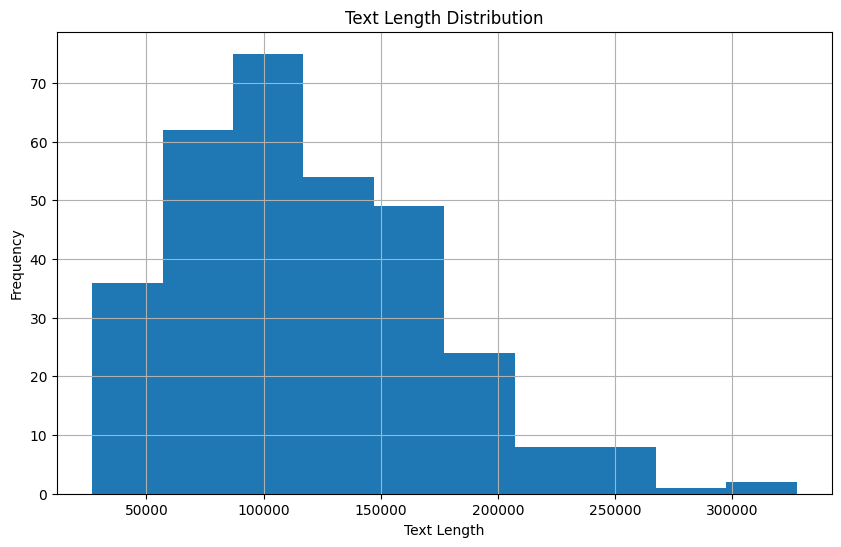

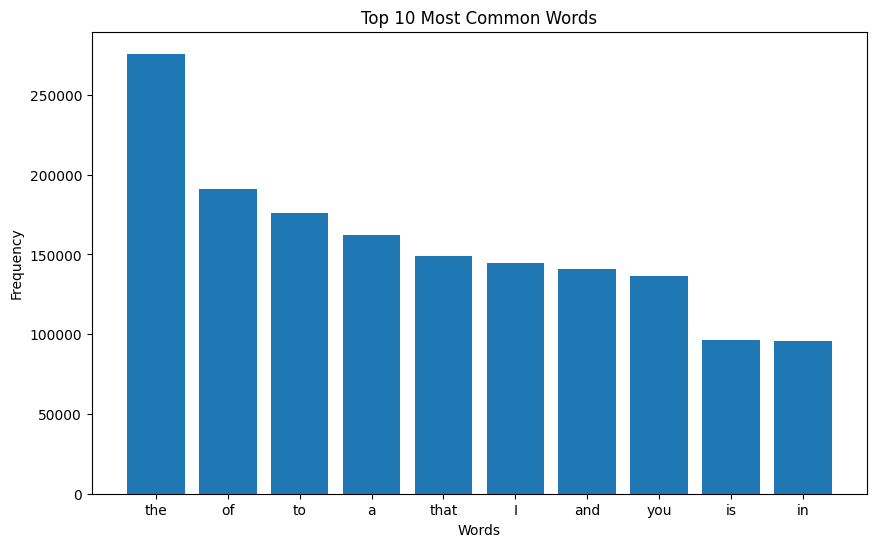

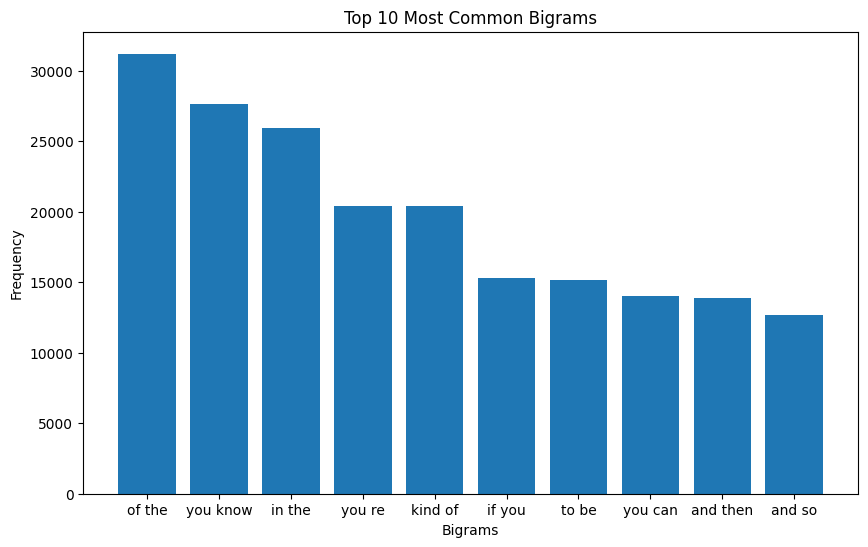

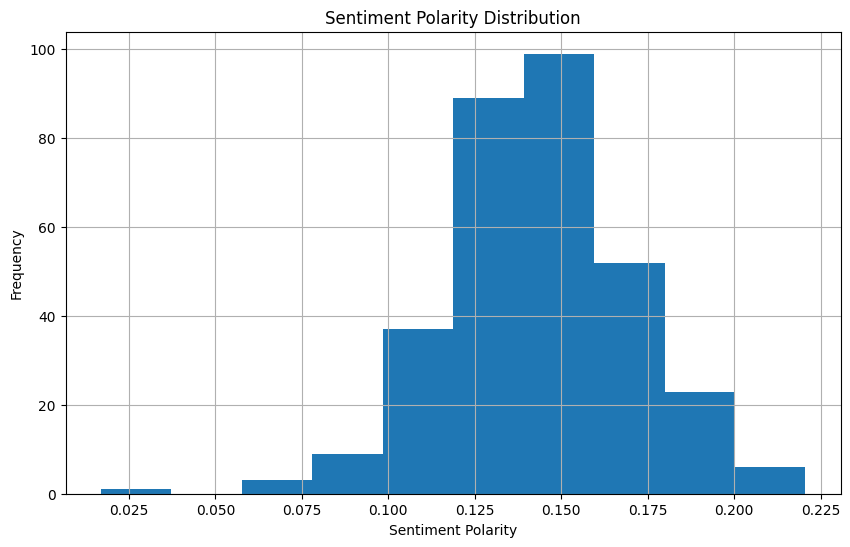

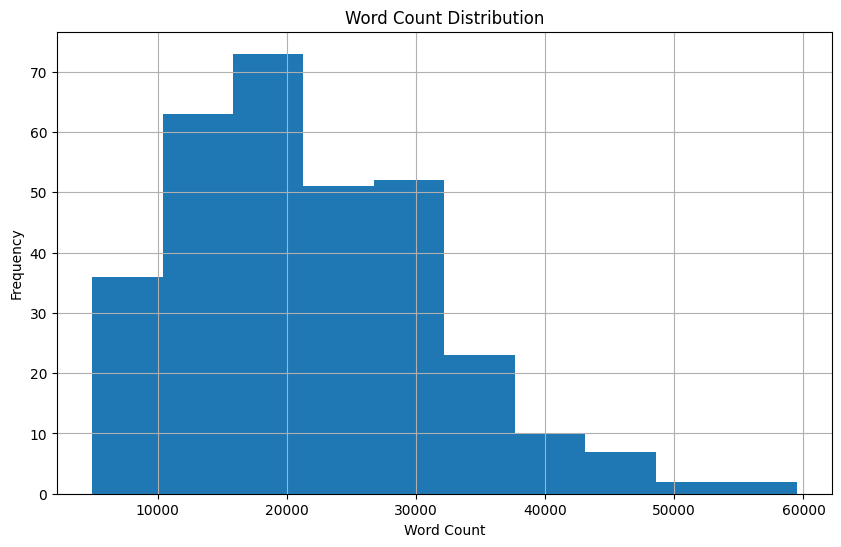

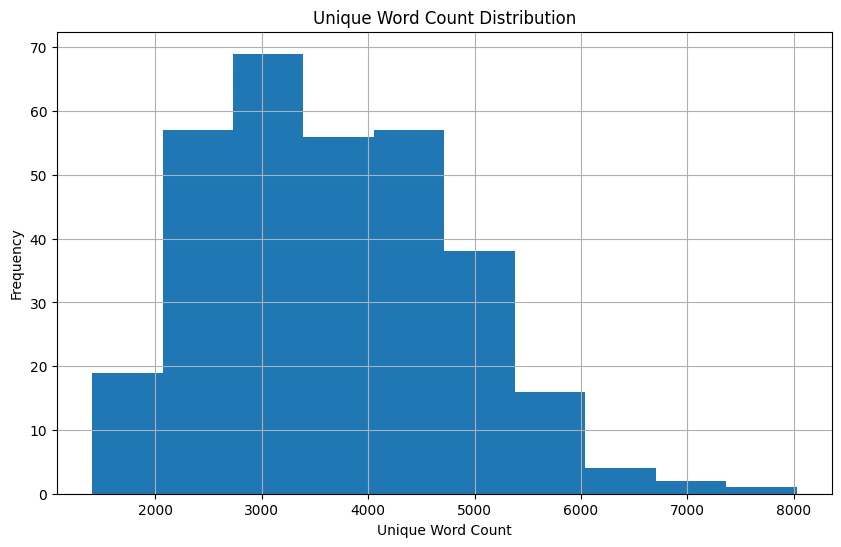

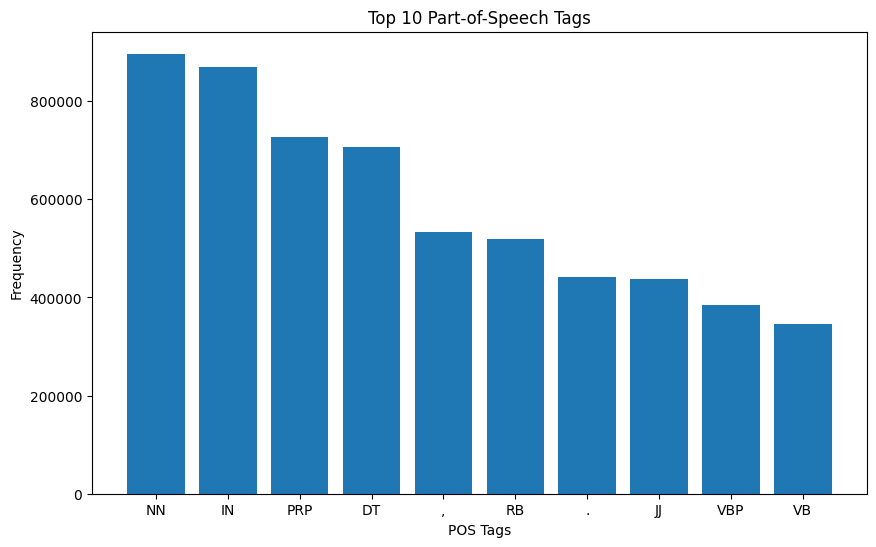

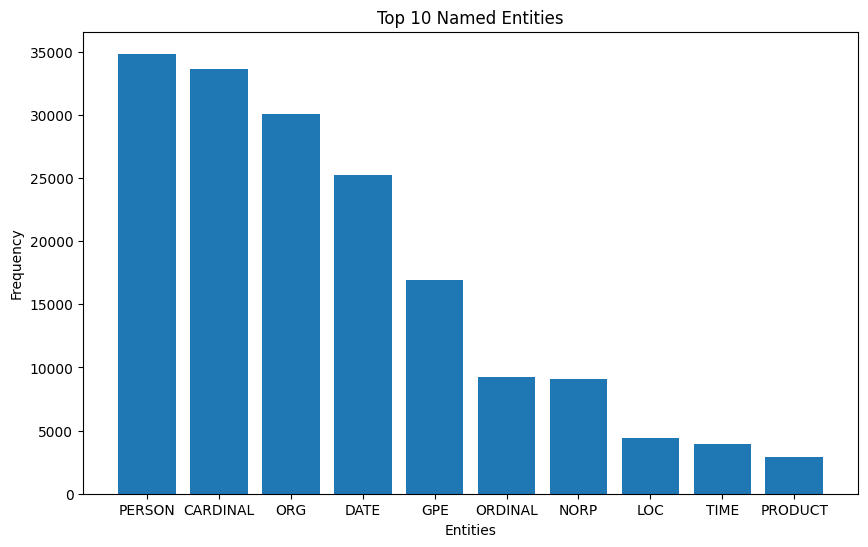

In [13]:
# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

def draw_word_cloud(df, title):
    # Combine all text data into a single string
    text = ' '.join(df.astype(str).values.flatten())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

def perform_eda(df, text_column):
    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(df.describe())
    print("\n")

    # Missing Values Analysis
    print("Missing Values Analysis:")
    print(df.isnull().sum())
    print("\n")

    # Distribution Plots
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 6))
    df['text_length'].hist()
    plt.title('Text Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    # Frequency Distribution of Words
    word_counts = Counter(" ".join(df[text_column]).split())
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

    # N-grams Analysis
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    ngrams = vectorizer.fit_transform(df[text_column])
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:10]
    ngrams, counts = zip(*ngrams_freq)
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, counts)
    plt.title('Top 10 Most Common Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.show()

    # Sentiment Analysis
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    df['sentiment'].hist()
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Word Count
    df['word_count'] = df[text_column].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 6))
    df['word_count'].hist()
    plt.title('Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Unique Words Count
    df['unique_word_count'] = df[text_column].apply(lambda x: len(set(x.split())))
    plt.figure(figsize=(10, 6))
    df['unique_word_count'].hist()
    plt.title('Unique Word Count Distribution')
    plt.xlabel('Unique Word Count')
    plt.ylabel('Frequency')
    plt.show()

    # Part-of-Speech Tagging
    df['pos_tags'] = df[text_column].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
    pos_counts = Counter([tag for sublist in df['pos_tags'] for _, tag in sublist])
    pos_tags, counts = zip(*pos_counts.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(pos_tags, counts)
    plt.title('Top 10 Part-of-Speech Tags')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.show()

    # Named Entity Recognition (NER)
    df['entities'] = df[text_column].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
    entity_counts = Counter([label for sublist in df['entities'] for _, label in sublist])
    entities, counts = zip(*entity_counts.most_common(10))
    plt.figure(figsize=(10, 6))
    plt.bar(entities, counts)
    plt.title('Top 10 Named Entities')
    plt.xlabel('Entities')
    plt.ylabel('Frequency')
    plt.show()

podcast_eda_results = perform_eda(podcast_df, 'text')
podcast_eda_results

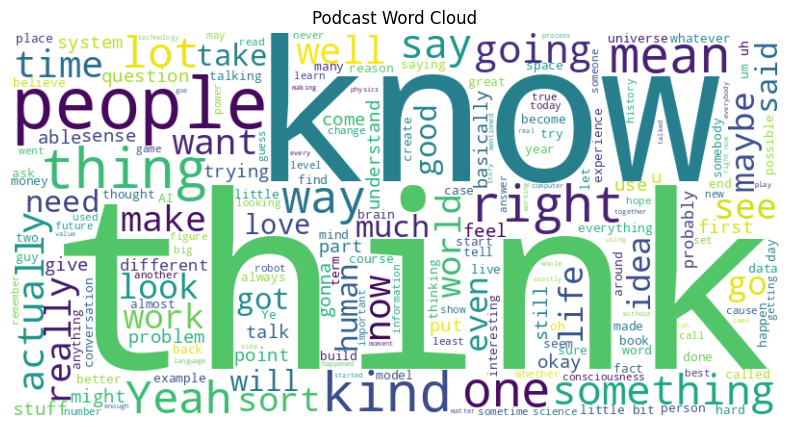

In [14]:
draw_word_cloud(podcast_df['text'], 'Podcast Word Cloud')

In [16]:
podcast_df.head()

,text,text_length,sentiment,word_count,unique_word_count,pos_tags,entities,clean_text
0,"As part of MIT course 6S099, Artificial Genera...",74068,0.171118,13424,2726,"[(As, IN), (part, NN), (of, IN), (MIT, NNP), (...","[(MIT, ORG), (Artificial General Intelligence,...",part mit course artificial general intelligenc...
1,As part of MIT course 6S099 on artificial gene...,57788,0.116574,10217,2474,"[(As, IN), (part, NN), (of, IN), (MIT, NNP), (...","[(MIT, ORG), (Christoph Koch, PERSON), (the Al...",part mit course artificial general intelligenc...
2,"You've studied the human mind, cognition, lang...",33940,0.106534,5989,1762,"[(You, PRP), ('ve, VBP), (studied, VBN), (the,...","[(Plato, ORG), (B., NORP), (Nietzsche, ORG), (...",studied human mind cognition language vision e...
3,What difference between biological neural netw...,34228,0.106092,5993,1528,"[(What, WP), (difference, NN), (between, IN), ...","[(First, ORDINAL), (One, CARDINAL), (RNN, ORG)...",difference biological neural networks artifici...
4,The following is a conversation with Vladimir ...,36171,0.125654,6374,1481,"[(The, DT), (following, NN), (is, VBZ), (a, DT...","[(Vladimir Vapnik, PERSON), (VC, PERSON), (the...",following conversation vladimir vapnik co inve...


# Data Pre-Processing

Natural Language Processing techniques are applied to remove stopwords, punctuation, and numbers. Uppercase words are converted to lowercase as well. Pre-processing trims the data down and keeps significant words that are useful for model training. Additionally, training and testing will require less computation since the new dataset will contain less data than the original.

In [32]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# define new dataframe
podcast_df_new = pd.DataFrame()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert the tokens to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation and numbers
    words = [word for word in tokens if word.isalpha()]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Join the words back into a single string
    text = ' '.join(words)

    return text

podcast_df_new['clean_text'] = podcast_df['text'].apply(preprocess_text)

Descriptive Statistics:
                                               clean_text
count                                                 319
unique                                                318
top     following conversation kyle vogt president cto...
freq                                                    2


Missing Values Analysis:
clean_text    0
dtype: int64




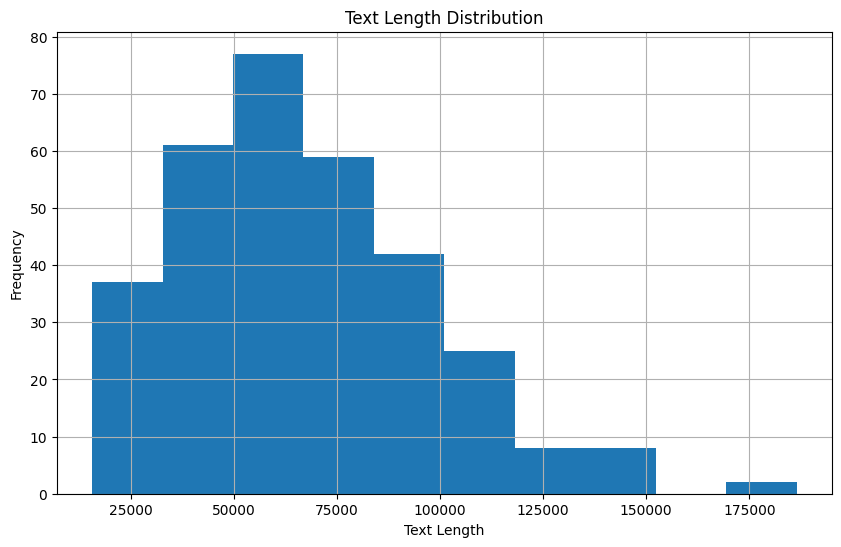

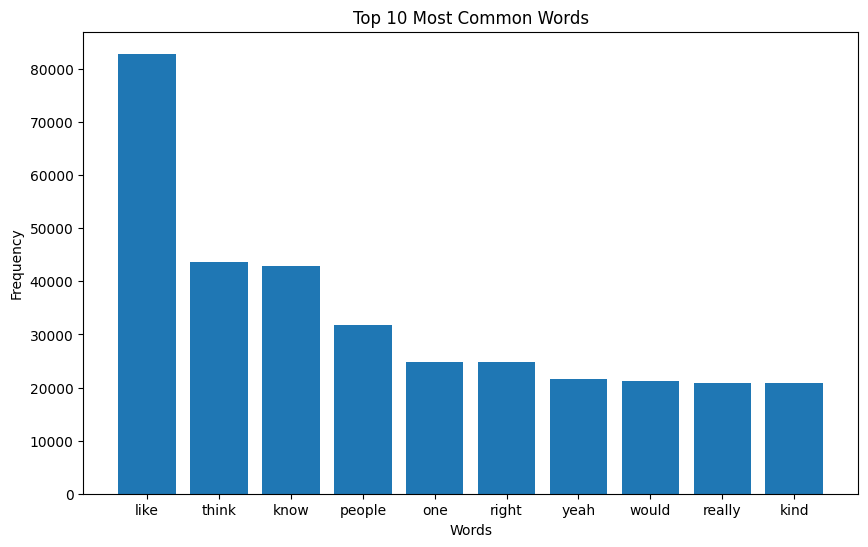

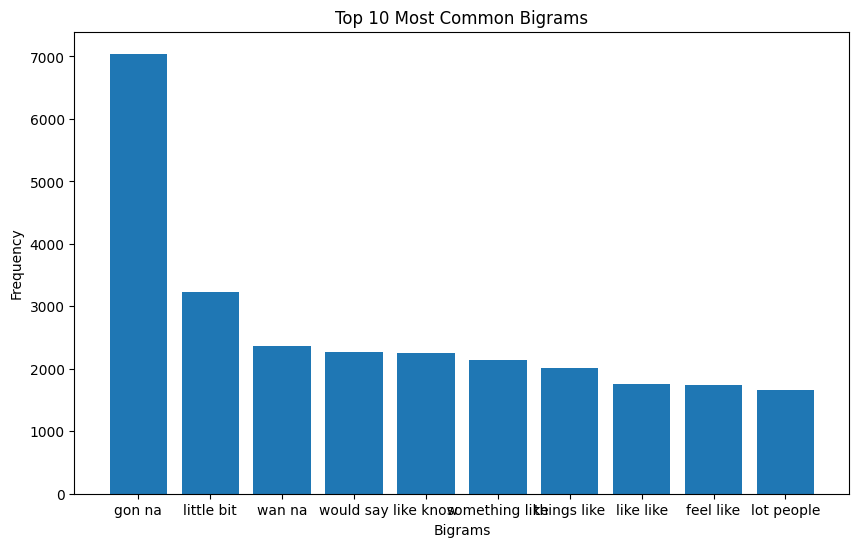

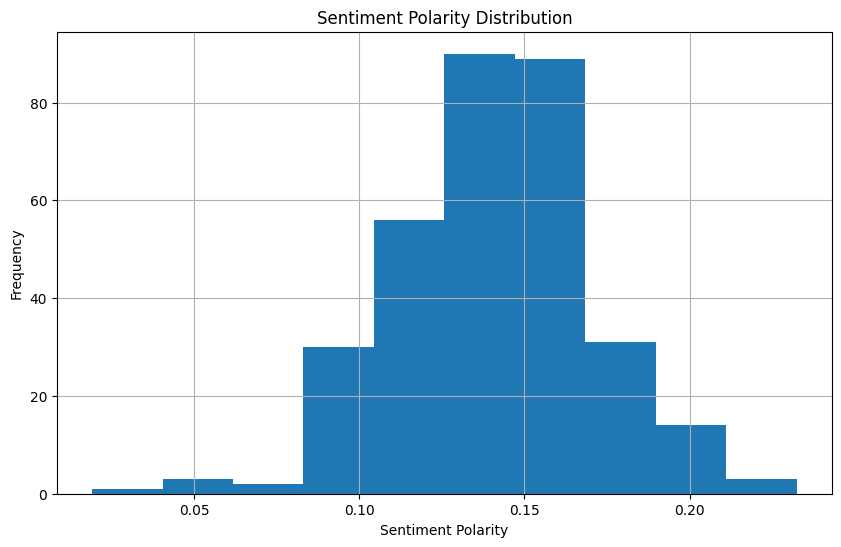

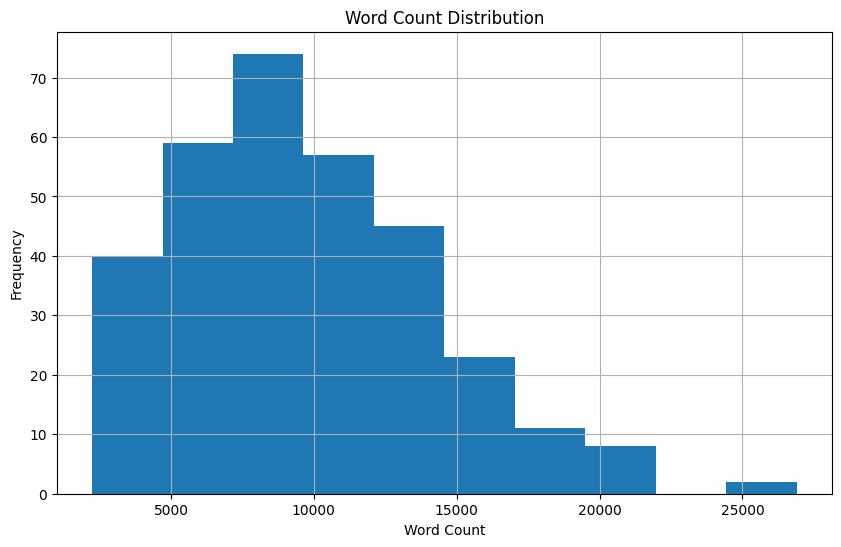

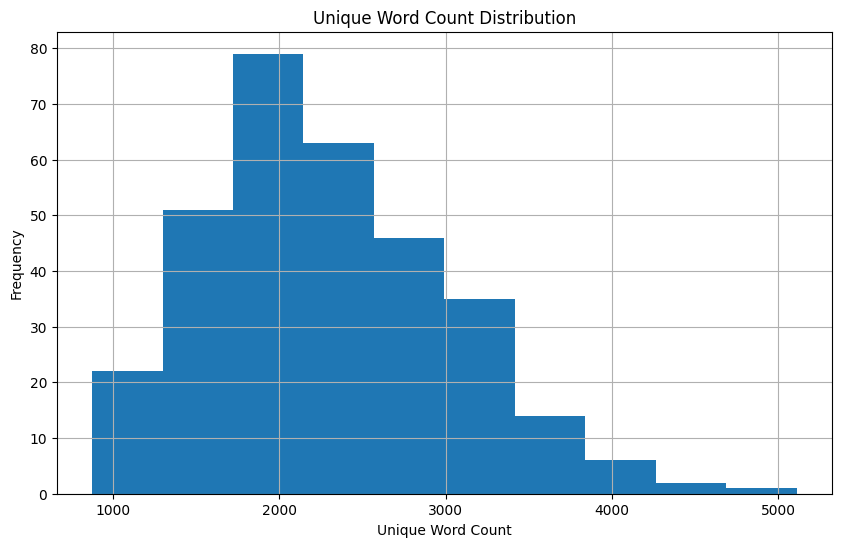

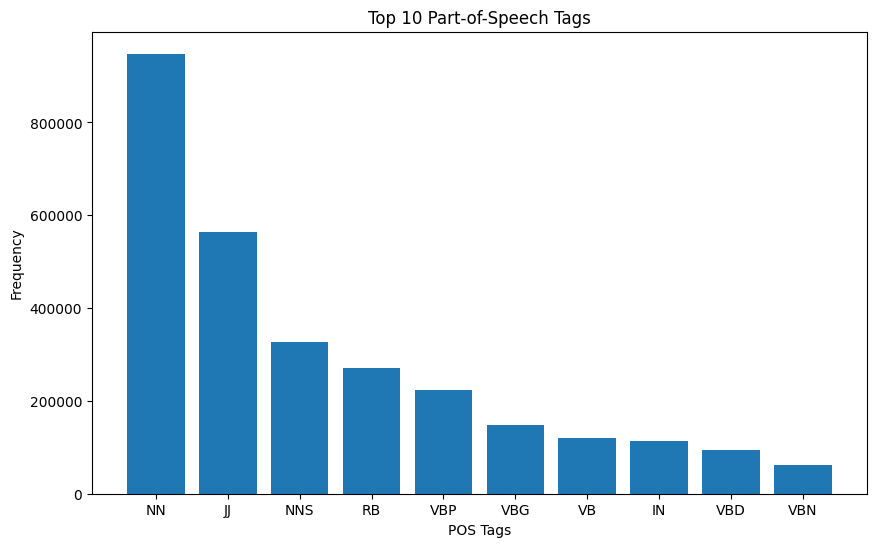

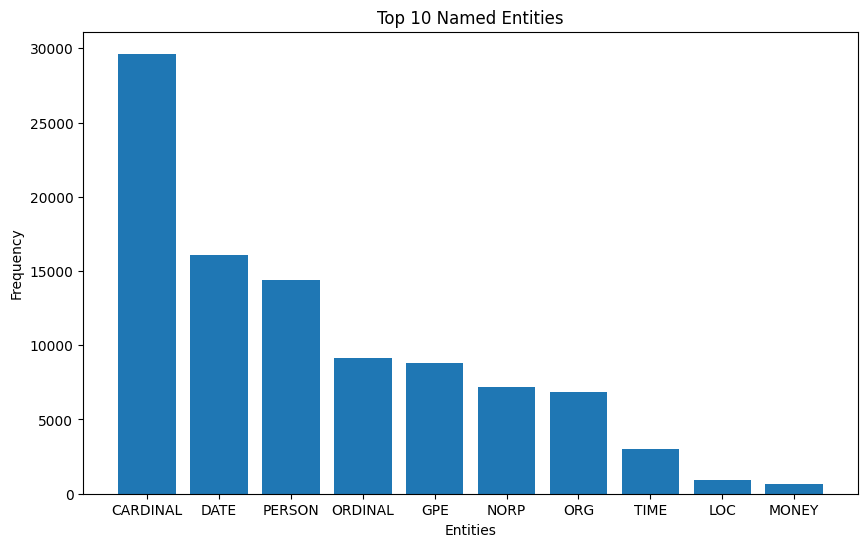

In [35]:
podcast_eda_results_new = perform_eda(podcast_df_new, 'clean_text')
podcast_eda_results_new

In [36]:
podcast_df_new.head()

,clean_text,text_length,sentiment,word_count,unique_word_count,pos_tags,entities
0,part mit course artificial general intelligenc...,42635,0.165822,6070,1810,"[(part, NN), (mit, NN), (course, NN), (artific...","[(max, PERSON), (two, CARDINAL), (first, ORDIN..."
1,part mit course artificial general intelligenc...,33308,0.112002,4565,1616,"[(part, NN), (mit, NN), (course, NN), (artific...","[(first, ORDINAL), (first, ORDINAL), (third, O..."
2,studied human mind cognition language vision e...,20779,0.092404,2823,1213,"[(studied, VBN), (human, JJ), (mind, NN), (cog...","[(plato, ORG), (power nietzsche, ORG), (darwin..."
3,difference biological neural networks artifici...,20780,0.101862,2823,990,"[(difference, NN), (biological, JJ), (neural, ...","[(first, ORDINAL), (one, CARDINAL), (first, OR..."
4,following conversation vladimir vapnik co inve...,21541,0.120489,2959,875,"[(following, VBG), (conversation, NN), (vladim...","[(soviet union, GPE), (moscow, GPE), (united s..."


In [47]:
from prettytable import PrettyTable

# compare original and new dataset
def compare_datasets(df_orig, df_new):
  # text_length
  text_length_1 = df_orig['text_length'].mean()
  text_length_2 = df_new['text_length'].mean()

  # word_count
  word_count_1 = df_orig['word_count'].mean()
  word_count_2 = df_new['word_count'].mean()

  # unique_word_count
  unique_word_count_1 = df_orig['unique_word_count'].mean()
  unique_word_count_2 = df_new['unique_word_count'].mean()

  # initialize table
  table = PrettyTable(['Table of Averages','Original Dataset', 'New Dataset'])

  # Add rows
  table.add_row(['text_length',text_length_1, text_length_2])
  table.add_row(['word_count',word_count_1, word_count_2])
  table.add_row(['unique_word_count',unique_word_count_1, unique_word_count_2])

  # print(tabulate(datafortable, headers=tableheaders, tablefmt="grid"))
  print(table)

compare_datasets(podcast_df, podcast_df_new)

+-------------------+--------------------+-------------------+
| Table of Averages |  Original Dataset  |    New Dataset    |
+-------------------+--------------------+-------------------+
|    text_length    | 118604.9843260188  | 67332.06896551725 |
|     word_count    | 21672.557993730406 | 9713.037617554859 |
| unique_word_count | 3647.6708463949844 | 2285.344827586207 |
+-------------------+--------------------+-------------------+


# Store dataset for model training

In [ ]:
# store the datasets for model training
dataset_path = "datasets"
os.makedirs(dataset_path, exist_ok=True)

podcast_df_new.to_csv(dataset_path + "/podcast.csv", index=False)